# Quantum Fourier Transform

 The quantum Fourier transform is a part of many quantum algorithms, notably Shor's algorithm for factoring and computing the discrete logarithm, the quantum phase estimation algorithm for estimating the eigenvalues of a unitary operator, and algorithms for the hidden subgroup problem.
 
The QFT harnesses the power of Hadamard gates to create superpositions, controlled-phase gates to introduce phase shifts based on quantum state conditions, and SWAP gates to reorder qubits to align with the desired Fourier transform outcomes. Together, these gates enable quantum algorithms to efficiently process information in ways that surpass classical computing capabilities.

<h2>Quantum Circuit Representation</h2>

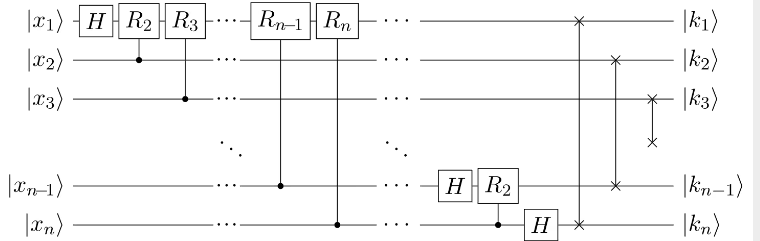

# Implementation of QFT

In [53]:
import numpy as np
from numpy import pi
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

<h3>Set up the Environment</h3>

In [54]:
def qft(circuit, n):
    # QFT Rotations
    for j in range(n):
        circuit.h(j)
        for k in range(j+1, n):
            circuit.cp(pi / 2**(k - j), j, k)
    
    # Swap qubits to reverse the order
    for i in range(n // 2):
        circuit.swap(i, n - i - 1)
    
    return circuit

<h3>Apply QFT</h3>

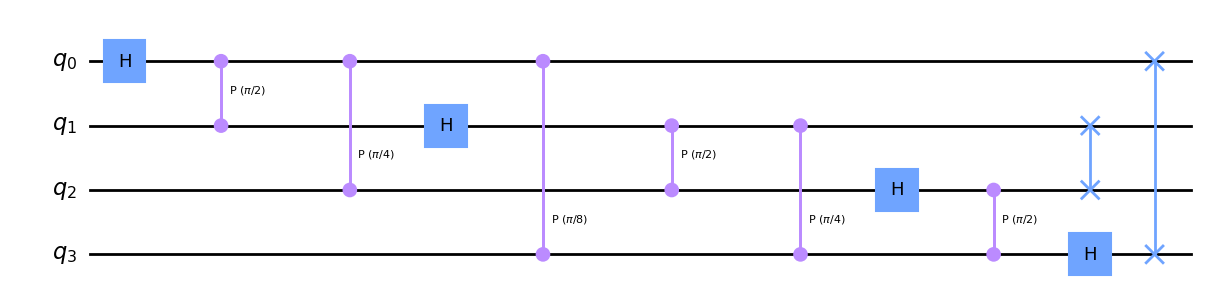

In [55]:
# Define the number of qubits
num_qubits = 4

# Create a quantum circuit
qc = QuantumCircuit(num_qubits)

# Apply the QFT using the defined function
qft(qc, num_qubits)

# Draw the entire circuit
qc.draw(output='mpl')

<h3>Example using number 5</h3>

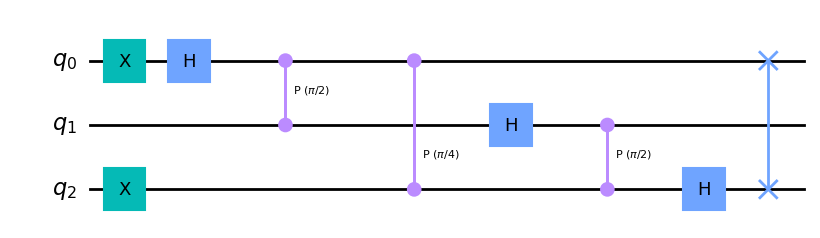

In [56]:
# Define the number of qubits
num_qubits = 3

# Create a quantum circuit
qc = QuantumCircuit(num_qubits)

# Encode the state |5⟩ (binary 101)
qc.x(0)  # For the least significant qubit
qc.x(2)  # For the most significant qubit

# Apply the QFT using the defined function
qft(qc, num_qubits)

# Draw the entire circuit
qc.draw(output='mpl')

<h3>Inverse QFT</h3>

In [57]:
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

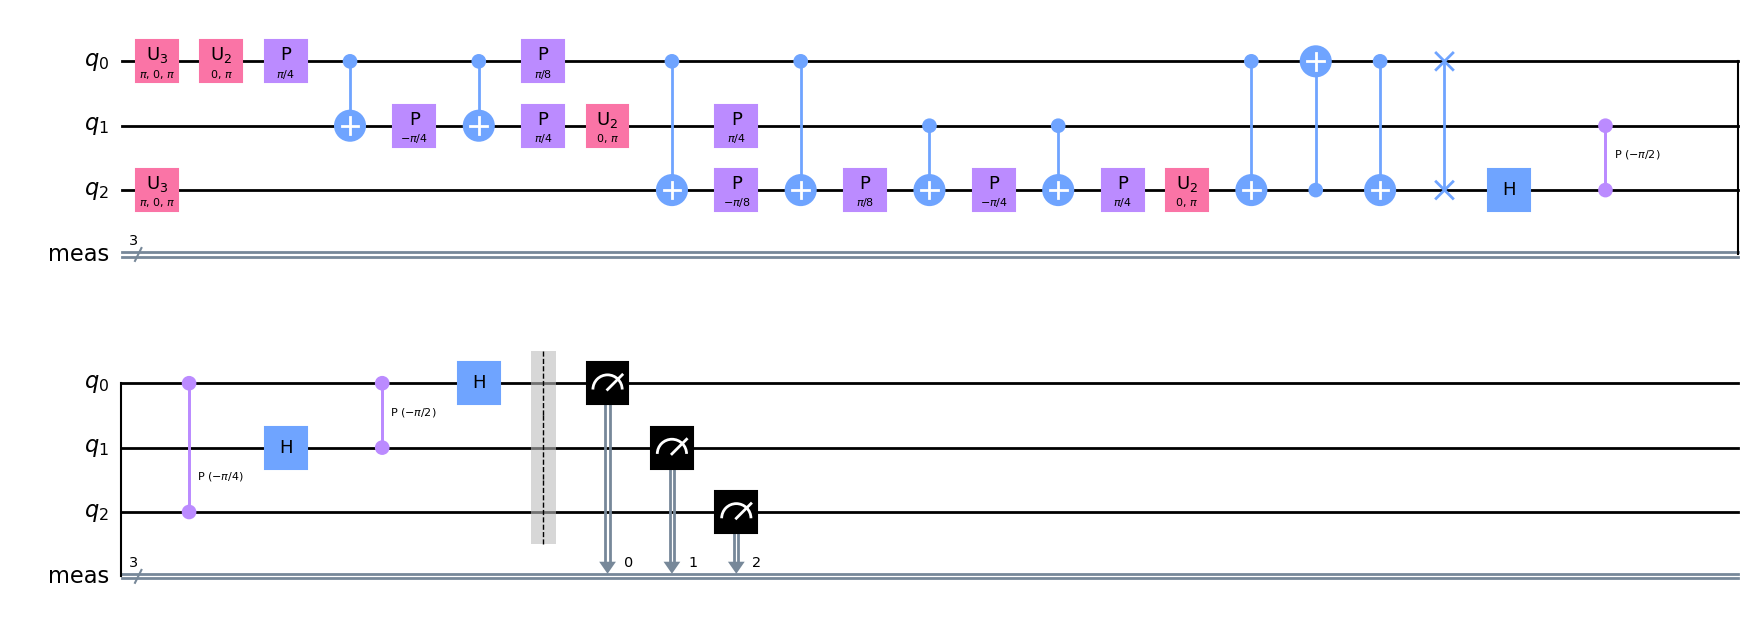

In [58]:
qc = inverse_qft(qc, num_qubits)
qc.measure_all()
qc.draw(output='mpl')

<h3>Results</h3>

{'101': 1024}


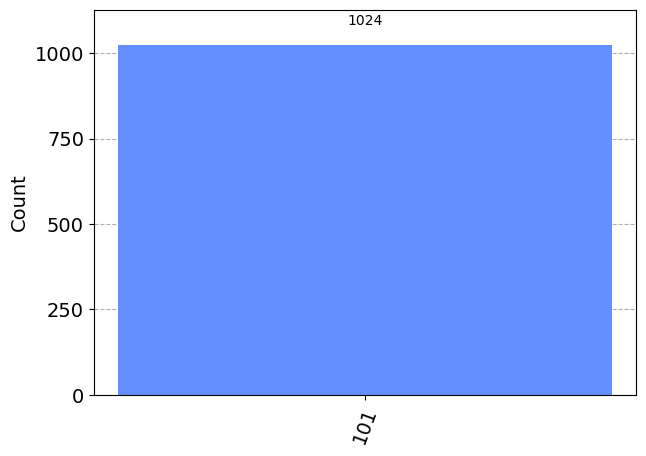

In [59]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qc, simulator, shots=1024)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qc)

# Print counts
print(counts)

# Plot histogram
plot_histogram(counts)

We observe that the highest probability outcome is 101. Correct!